In [2]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import csv
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from pandas import ExcelWriter
from pandas import ExcelFile

# Step 1: Chinese Dictionary (COMPLETE)

In [ ]:
#Function to check the dictionary
def check_dict(word_to_check):

    url = "https://www.purpleculture.net/dictionary-details/?word=" + str(word_to_check)
    data2 = requests.get(url).text
    soup = BeautifulSoup(data2)
    
    try:
        final_dict = str(soup.find(name="span", attrs={ "class": "en"}).text)
        dict_usage_tags = soup.find_all("div", attrs={ "class": "swordlist"})

        for t in dict_usage_tags:
            if str(t.text)[0] != "M":
                final_dict += ("\n" + str(t.text))

        dict_sentences_chinese = []
        dict_sentences_english = []
        for i in range(1,3,1):
            seni = "sen" + str(i)
            enseni = "ensen" + str(i)
            dict_sentences_english.append(str(soup.find(name="div", attrs={ "id": enseni}).text))
            dict_sentences_chinese_temp = str(soup.find(name="span", attrs={ "id": seni}).text)
            chinese_temp = ""
            pinyin_temp = ""
            for char in dict_sentences_chinese_temp:
                if re.search(u'[\u4e00-\u9fff]', char):
                    chinese_temp += char
                else:
                    pinyin_temp += char
            dict_sentences_chinese.append([chinese_temp, pinyin_temp])

        for i in range(2):
            final_dict += ("\n\n" + dict_sentences_chinese[i][0] + "\n" + dict_sentences_chinese[i][1] + "\n" + dict_sentences_english[i])
    
    except:
        final_dict = ""
    
    return final_dict

In [ ]:
#Check the dictionary for 3000 words
for each_3000_word in df2.index.to_list()[1:3000:1]:
    df2.loc[str(each_3000_word), 'dict_definition'] = check_dict(str(each_3000_word))

In [ ]:
df2.to_csv (r'C:\Users\Pamela\Documents\chinese_project\brand_new_dict.csv', header=True)
#Manual conversion to utf-8 done after above step

In [3]:
df3 = pd.read_excel(r'Most_Common_3000_Chinese_V2.xlsx')
df3.set_index('simplified_character',inplace = True)
df3

,traditional_character_one,traditional_character,rank,strokes,makeup,pinyin,alternate_pinyin,definition,dict_definition
simplified_character,,,,,,,,,
的,NaN,NaN,1,8画,\n白 + 3,de,"dí, dì","possessive, adjectival suffix",of; ~'s (possessive particle); (used after an ...
一,NaN,NaN,2,1画,\n一 + 0,yī,NaN,"one; a, an; alone",one; 1; single; a (article); as soon as; entir...
是,NaN,NaN,3,9画,\n日 + 5,shì,NaN,"indeed, yes, right; to be; demonstrative prono...",is; are; am; yes; to be\n但是 [ dàn shì ]: but; ...
不,NaN,NaN,4,4画,\n一 + 3,bù,"fǒu, fōu","no, not; un-; negative prefix",(negative prefix); not; no\n不客气 [ bù kè qi ]: ...
了,瞭,瞭,5,2画,\n亅了 + 1,le,liǎo,to finish; particle of completed action,(modal particle intensifying preceding clause)...
...,...,...,...,...,...,...,...,...,...
颓,頹,NaN,2996,13画,\n页 + 7,tuí,NaN,"ruined, decayed; disintegrate",to crumble; to collapse; to decline; to decay;...
熏,熏,熏 燻,2997,14画,\n火灬 + 10,xūn,xùn,"smoke, fog, vapor; smoke, cure",to smoke; to fumigate; to assail the nostrils;...
瑛,NaN,NaN,2998,13画,\n玉玊王 + 9,yīng,NaN,luster of gem; crystal,(crystal); lustrous\n周传瑛 [ zhōu chuán yīng ]: ...


# Step 2: Create global_songs_df - Google Search for Chinese Lyrics

In [4]:
song_names = []
with open('song_names.csv', newline='') as f:
    reader = csv.reader(f)
    song_names = list(reader)
song_names = [keyword for list1 in song_names for keyword in list1]
song_names

['bu wei shei er zuo',
 'xue luo xia de sheng',
 'gan bei wu yue tian',
 'ye kong zhong zui',
 'skate hua ban hua chen',
 'dou niu hua chen',
 'jackdaw boy hua chen',
 'yi bei zi yi chang meng',
 'hua xin painted skin',
 'piao xiang bei fang',
 'mo fa cheng bao',
 'xing yun fu hao',
 'chong ai',
 'shi ni tf ',
 'qing chun xiu lian',
 'bu wan mei de xiao',
 'da meng xiang jia',
 'zhen xin hua tai mao',
 'xing yang zhi ming',
 'yi xiao qing chen',
 'di yi ci gao bai',
 'wo de peng you',
 'gao bai qi qiu',
 'xin zhong deyue',
 'yi ran ai ni',
 'ai xia hu xia',
 'wang le ni wang le wo',
 'gai bian zi zi',
 'qing hua qi',
 'qi li xiang',
 'dao xiang',
 'gao bai qi qiu',
 'zui mei de tai yang',
 'na xie ni hen mao xian de meng',
 'yi ran yi bao zha',
 'xiang wo zhe yang de ren',
 'chong bai fish',
 'yi qian nian yi hou',
 'ai yao zen me shuo chu kou',
 'xiao jiu wo',
 'zui chi bi',
 'ai xiao de yan jing',
 'yuan zou gao fei ',
 'xi huan ni',
 'san sheng san shi',
 'you dian tian',
 'jiang na

In [5]:
driver_path = r"C:\Users\Pamela\Downloads\chromedriver.exe"
lyric_links = []

#Google search for lyrics
def google_search(keyword):
    print(keyword)
    driver = webdriver.Chrome(driver_path)
    driver.get("http://www.google.com")
    keyword = "musicacrossasia " + keyword
    searchbox=  driver.find_element_by_name("q")
    searchbox.send_keys(keyword)
    time.sleep(0.1)
    searchbox.send_keys(Keys.ENTER)
    time.sleep(0.1)

    soup = BeautifulSoup(driver.page_source)
    a_tags = soup.find_all("a")
    for a_tag in a_tags:
        if a_tag and str(a_tag.get("href")).startswith("https://musicacrossasia"):
            print(str(a_tag.get("href")))
            lyric_links.append(str(a_tag.get("href")))
            break
    driver.close()

for keyword in song_names:
    google_search(keyword)
print(lyric_links)

bu wei shei er zuo
https://musicacrossasia.blogspot.com/2016/06/jj-lin-twilight-lyric-with-pinyin.html
xue luo xia de sheng
https://musicacrossasia.blogspot.com/2018/09/lu-hu-xue-luo-xia-de-sheng-yin-lyrics.html
gan bei wu yue tian
https://musicacrossasia.blogspot.com/
ye kong zhong zui
https://musicacrossasia.blogspot.com/2016/07/gem-ye-kong-zhong-zui-liang-de-xing.html
skate hua ban hua chen
https://musicacrossasia.blogspot.com/2017/06/hua-chen-yu-qi-tian-lyrics-with-pinyin.html
dou niu hua chen
https://musicacrossasia.blogspot.com/2017/06/hua-chen-yu-qi-tian-lyrics-with-pinyin.html
jackdaw boy hua chen
https://musicacrossasia.blogspot.com/2017/06/hua-chen-yu-qi-tian-lyrics-with-pinyin.html
yi bei zi yi chang meng
hua xin painted skin
piao xiang bei fang
https://musicacrossasia.blogspot.com/2017/03/namewee-stranger-in-north-lyrics-with.html
mo fa cheng bao
xing yun fu hao
https://musicacrossasia.blogspot.com/2017/08/hebe-tien-xiao-xing-yun-lyrics-english.html
chong ai
https://musicac

In [7]:
global_songs = []
df = pd.read_excel (r'Most_Common_3000_Chinese.xlsx', sheet_name='traditional_sheet')
df.index = df['traditional_character_one']
df2 = pd.read_excel (r'Most_Common_3000_Chinese.xlsx', sheet_name='master_sheet')
df2.set_index ('simplified_character', inplace=True)

for url in lyric_links:
    data = requests.get(url).text
    soup = BeautifulSoup(data)

    span_tag = soup.find(name="div", attrs={ "class": "post-body entry-content"})
    lyrics_string = str(span_tag.text).split("\n")

    lyrics_string_cleaned = []
    unique_characters = []
    one_lyrics = []
    lyrics_string_cleaned.append(url)
    for row in lyrics_string:
        if row.startswith(("Singer","Album","Title")):
            lyrics_string_cleaned.append(row)
        elif len(row) > 0 and re.search(u'[\u4e00-\u9fff]', row[0]):
            simplified_string = []
            for word in row:
                word_pinyin_pair = []
                if re.search(u'[\u4e00-\u9fff]', word):
                    try:
                        #word is a traditional character
                        simplified_character = df.loc[str(word),'simplified_character']
                        pinyin = df.loc[str(word),'pinyin']
                        word_pinyin_pair.append(simplified_character)
                        word_pinyin_pair.append(pinyin)
                        simplified_string.append(word_pinyin_pair)

                    except:
                        #word is not a traditional character
                        if word in df2.index.to_list():
                            #word is found as a simplified character
                            simplified_character = word
                            pinyin = df2.loc[str(word),'pinyin']
                            word_pinyin_pair.append(simplified_character)
                            word_pinyin_pair.append(pinyin)
                            simplified_string.append(word_pinyin_pair)
                        else:
                            #word is not found in found in the 3000 words
                            simplified_character = word
                            word_pinyin_pair.append(word)
                            word_pinyin_pair.append('')
                            simplified_string.append(word_pinyin_pair)
                    finally:
                        unique_characters.append(simplified_character)
                else:
                    simplified_string.append(word)
            one_lyrics.append(simplified_string)
    lyrics_string_cleaned.append(one_lyrics)
    global_songs.append(lyrics_string_cleaned)
global_songs

[['https://musicacrossasia.blogspot.com/2016/06/jj-lin-twilight-lyric-with-pinyin.html',
  'Singer :\xa0JJ Lin 林俊傑',
  'Album :\xa0From M.E To Myself',
  'Title : Bu wei shui er zuo de ge\xa0不為誰而作的歌',
  [[['原', 'yuán'],
    ['谅', 'liàng'],
    ['我', 'wǒ'],
    ['这', 'zhè'],
    ['一', 'yī'],
    ['首', 'shǒu'],
    ' ',
    ['不', 'bù'],
    ['为', 'wèi'],
    ['谁', 'shuí'],
    ['而', 'ér'],
    ['作', 'zuò'],
    ['的', 'de'],
    ['歌', 'gē']],
   [['感', 'gǎn'],
    ['觉', 'jué'],
    ['上', 'shàng'],
    ['彷', ''],
    ['佛', 'fó'],
    ['窗', 'chuāng'],
    ['外', 'wài'],
    ['的', 'de'],
    ['夜', 'yè'],
    ['色', 'sè']],
   [['曾', 'céng'],
    ['经', 'jīng'],
    ['有', 'yǒu'],
    ['那', 'nà'],
    ['一', 'yī'],
    ['刻', 'kè'],
    ' ',
    ['回', 'huí'],
    ['头', 'tóu'],
    ['竟', 'jìng'],
    ['然', 'rán'],
    ['认', 'rèn'],
    ['不', 'bù'],
    ['得', 'dé']],
   [['需', 'xū'],
    ['要', 'yào'],
    ' ',
    ['从', 'cóng'],
    ['记', 'jì'],
    ['忆', 'yì'],
    ['再', 'zài'],
    ['摸', 'mō'],
   

In [10]:
global_songs_df = pd.DataFrame(global_songs)
global_songs_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,https://musicacrossasia.blogspot.com/2016/06/j...,Singer : JJ Lin 林俊傑,Album : From M.E To Myself,Title : Bu wei shui er zuo de ge 不為誰而作的歌,"[[[原, yuán], [谅, liàng], [我, wǒ], [这, zhè], [一...",None,None,None,None,None,None,None
1,https://musicacrossasia.blogspot.com/2018/09/l...,Singer: Lu Hu 陸虎,Album: Xue Luo Xia De Sheng Yin 雪落下的聲音,Title: Xue Luo Xia De Sheng Yin 雪落下的聲音 | 電視劇《延...,"[[[轻, qīng], [轻, qīng], ，, [落, luò], [在, zài],...",None,None,None,None,None,None,None
2,https://musicacrossasia.blogspot.com/,[],None,None,None,None,None,None,None,None,None,None
3,https://musicacrossasia.blogspot.com/2016/07/g...,Singer : G.E.M 鄧紫棋,Album : Ye Kong Zhong Zui Liang De Xing 夜空中最亮的星,Title : Ye Kong Zhong Zui Liang De Xing 夜空中最亮的星,"[[[夜, yè], [空, kōng], [中, zhōng], [最, zuì], [亮...",None,None,None,None,None,None,None
4,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh...",None,None,None,None,None,None,None


In [34]:
#Drop rows if column 4 is NaN
global_songs_df_2 = global_songs_df.dropna(subset=[4])
global_songs_df_2 = global_songs_df_2.drop([21])
global_songs_df_2 = global_songs_df_2.dropna(axis = 1,how='all')
print(len(global_songs_df_2))

col_names = ['url', 'singer', 'album', 'song_name', 'song']
global_songs_df_2.columns = col_names

global_songs_df_2.head()

35


,url,singer,album,song_name,song
0,https://musicacrossasia.blogspot.com/2016/06/j...,Singer : JJ Lin 林俊傑,Album : From M.E To Myself,Title : Bu wei shui er zuo de ge 不為誰而作的歌,"[[[原, yuán], [谅, liàng], [我, wǒ], [这, zhè], [一..."
1,https://musicacrossasia.blogspot.com/2018/09/l...,Singer: Lu Hu 陸虎,Album: Xue Luo Xia De Sheng Yin 雪落下的聲音,Title: Xue Luo Xia De Sheng Yin 雪落下的聲音 | 電視劇《延...,"[[[轻, qīng], [轻, qīng], ，, [落, luò], [在, zài],..."
3,https://musicacrossasia.blogspot.com/2016/07/g...,Singer : G.E.M 鄧紫棋,Album : Ye Kong Zhong Zui Liang De Xing 夜空中最亮的星,Title : Ye Kong Zhong Zui Liang De Xing 夜空中最亮的星,"[[[夜, yè], [空, kōng], [中, zhōng], [最, zuì], [亮..."
4,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh..."
5,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh..."


# To global songs df, add features (unique_char, number_of_char, etc)

In [69]:
def song_chinese(song):
    return [j[0] for i in song for j in i if re.search(u'[\u4e00-\u9fff]', j[0])]
def add_song_feature_number_char(song):
    unique_chinese_column = []
    unique_chinese_column = unique_chinese_column + [j[0] for i in song for j in i if re.search(u'[\u4e00-\u9fff]', j[0])]
    return len(unique_chinese_column)
def add_song_feature_unique_char(song):
    unique_chinese_column = []
    unique_chinese_column = unique_chinese_column + [j[0] for i in song for j in i if re.search(u'[\u4e00-\u9fff]', j[0])]
    return list(set(unique_chinese_column))
def add_song_feature_number_unique_char(unique_char):
    return len(unique_char)
global_songs_df_2['song_chinese'] = global_songs_df_2['song'].apply(song_chinese)
global_songs_df_2['number_of_char'] = global_songs_df_2['song'].apply(add_song_feature_number_char)
global_songs_df_2['unique_char'] = global_songs_df_2['song'].apply(add_song_feature_unique_char)
global_songs_df_2['number_of_unique_char'] = global_songs_df_2['unique_char'].apply(add_song_feature_number_unique_char)
global_songs_df_2.head(20)

,url,singer,album,song_name,song,unique_char,group,number_of_char,number_of_unique_char,song_chinese
0,https://musicacrossasia.blogspot.com/2016/06/j...,Singer : JJ Lin 林俊傑,Album : From M.E To Myself,Title : Bu wei shui er zuo de ge 不為誰而作的歌,"[[[原, yuán], [谅, liàng], [我, wǒ], [这, zhè], [一...","[记, 然, 头, 抬, 过, 些, 忘, 上, 色, 实, 觉, 心, 去, 感, 水, ...",JJ Lin,332,106,"[原, 谅, 我, 这, 一, 首, 不, 为, 谁, 而, 作, 的, 歌, 感, 觉, ..."
1,https://musicacrossasia.blogspot.com/2018/09/l...,Singer: Lu Hu 陸虎,Album: Xue Luo Xia De Sheng Yin 雪落下的聲音,Title: Xue Luo Xia De Sheng Yin 雪落下的聲音 | 電視劇《延...,"[[[轻, qīng], [轻, qīng], ，, [落, luò], [在, zài],...","[天, 明, 睛, 卿, 般, 贪, 隻, 轻, 它, 幻, 並, 逢, 开, 心, 结, ...",Other Singers,139,98,"[轻, 轻, 落, 在, 我, 掌, 心, 静, 静, 在, 掌, 中, 结, 冰, 相, ..."
3,https://musicacrossasia.blogspot.com/2016/07/g...,Singer : G.E.M 鄧紫棋,Album : Ye Kong Zhong Zui Liang De Xing 夜空中最亮的星,Title : Ye Kong Zhong Zui Liang De Xing 夜空中最亮的星,"[[[夜, yè], [空, kōng], [中, zhōng], [最, zuì], [亮...","[明, 睛, 记, 祈, 颗, 今, 过, 迷, 忘, 同, 願, 独, 祷, 存, 心, ...",Other Singers,339,93,"[夜, 空, 中, 最, 亮, 的, 星, 能, 否, 听, 清, 那, 仰, 望, 的, ..."
4,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh...","[天, 承, 剧, 重, 演, 死, 亲, 春, 带, 山, 错, 早, 头, 刃, 南, ...",Other Singers,501,288,"[日, 和, 月, 在, 重, 演, 谁, 号, 令, 齐, 天, 齐, 天, 断, 恩, ..."
5,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh...","[天, 承, 剧, 重, 演, 死, 亲, 春, 带, 山, 错, 早, 头, 刃, 南, ...",Other Singers,501,288,"[日, 和, 月, 在, 重, 演, 谁, 号, 令, 齐, 天, 齐, 天, 断, 恩, ..."
6,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh...","[天, 承, 剧, 重, 演, 死, 亲, 春, 带, 山, 错, 早, 头, 刃, 南, ...",Other Singers,501,288,"[日, 和, 月, 在, 重, 演, 谁, 号, 令, 齐, 天, 齐, 天, 断, 恩, ..."
7,https://musicacrossasia.blogspot.com/2017/03/n...,"Singer : Namewee 黃明志, Wang Leehom 王力宏",Album : CROSSOVER ASIA,Title : Piao Xiang Bei Fang 漂向北方,"[[[飘, piāo], [向, xiàng], [北, běi], [方, fāng], ...","[忍, 天, 迹, 求, 融, 头, 怀, 抬, 幻, 过, 措, 环, 上, 职, 涮, ...",Other Singers,809,321,"[飘, 向, 北, 方, 别, 问, 我, 家, 乡, 高, 耸, 古, 老, 的, 城, ..."
8,https://musicacrossasia.blogspot.com/2017/08/h...,Singer : Hebe Tien 田馥甄,Album : A Little Happiness 小幸運,Title : 小幸運 Xiao Xing Yun,"[[[我, wǒ], [听, tīng], [见, jiàn], [雨, yǔ], [滴, ...","[天, 雨, 直, 记, 懂, 陪, 然, 春, 幸, 忘, 上, 願, 觉, 开, 心, ...",Other Singers,416,162,"[我, 听, 见, 雨, 滴, 落, 在, 青, 青, 草, 地, 我, 听, 见, 远, ..."
9,https://musicacrossasia.blogspot.com/2017/07/t...,Singer : TFBOYS,Album : Big Dreamer,Title : Chong Ai 寵愛,"[[[小, xiǎo], [小, xiǎo], [的, de], [年, nián], [纪...","[忍, 天, 睛, 明, 懂, 哟, 陪, 头, 过, 脑, 上, 何, 开, 蔥, 心, ...",TF Boys,632,162,"[小, 小, 的, 年, 纪, 还, 不, 懂, 什, 么, 是, 爱, 却, 被, 你, ..."
10,https://musicacrossasia.blogspot.com/2017/06/t...,Singer : TFBOYS,Album : Shi Ni 是你 (It's You),Title : Shi Ni 是你,"[[[王, wáng], [俊, jùn], [凯, kǎi], , W, a, n, g...","[精, 天, 直, 明, 重, 懂, 宙, 某, 过, 些, 像, 烟, 狐, 烁, 独, ...",TF Boys,616,174,"[王, 俊, 凯, 易, 烊, 千, 璽, 王, 源, 一, 直, 相, 信, 着, 在, ..."


# Split songs into groups for comparison (if user wants)

In [71]:
def split_group(singer_name):
    if "JJ Lin" in singer_name:
        return "JJ Lin"
    elif "TF" in singer_name:
        return "TF Boys"
    else:
        return "Other Singers"
global_songs_df_2['group'] = global_songs_df_2['singer'].apply(split_group)
global_songs_df_2

,url,singer,album,song_name,song,unique_char,group,number_of_char,number_of_unique_char,song_chinese
0,https://musicacrossasia.blogspot.com/2016/06/j...,Singer : JJ Lin 林俊傑,Album : From M.E To Myself,Title : Bu wei shui er zuo de ge 不為誰而作的歌,"[[[原, yuán], [谅, liàng], [我, wǒ], [这, zhè], [一...","[记, 然, 头, 抬, 过, 些, 忘, 上, 色, 实, 觉, 心, 去, 感, 水, ...",JJ Lin,332,106,"[原, 谅, 我, 这, 一, 首, 不, 为, 谁, 而, 作, 的, 歌, 感, 觉, ..."
1,https://musicacrossasia.blogspot.com/2018/09/l...,Singer: Lu Hu 陸虎,Album: Xue Luo Xia De Sheng Yin 雪落下的聲音,Title: Xue Luo Xia De Sheng Yin 雪落下的聲音 | 電視劇《延...,"[[[轻, qīng], [轻, qīng], ，, [落, luò], [在, zài],...","[天, 明, 睛, 卿, 般, 贪, 隻, 轻, 它, 幻, 並, 逢, 开, 心, 结, ...",Other Singers,139,98,"[轻, 轻, 落, 在, 我, 掌, 心, 静, 静, 在, 掌, 中, 结, 冰, 相, ..."
3,https://musicacrossasia.blogspot.com/2016/07/g...,Singer : G.E.M 鄧紫棋,Album : Ye Kong Zhong Zui Liang De Xing 夜空中最亮的星,Title : Ye Kong Zhong Zui Liang De Xing 夜空中最亮的星,"[[[夜, yè], [空, kōng], [中, zhōng], [最, zuì], [亮...","[明, 睛, 记, 祈, 颗, 今, 过, 迷, 忘, 同, 願, 独, 祷, 存, 心, ...",Other Singers,339,93,"[夜, 空, 中, 最, 亮, 的, 星, 能, 否, 听, 清, 那, 仰, 望, 的, ..."
4,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh...","[天, 承, 剧, 重, 演, 死, 亲, 春, 带, 山, 错, 早, 头, 刃, 南, ...",Other Singers,501,288,"[日, 和, 月, 在, 重, 演, 谁, 号, 令, 齐, 天, 齐, 天, 断, 恩, ..."
5,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh...","[天, 承, 剧, 重, 演, 死, 亲, 春, 带, 山, 错, 早, 头, 刃, 南, ...",Other Singers,501,288,"[日, 和, 月, 在, 重, 演, 谁, 号, 令, 齐, 天, 齐, 天, 断, 恩, ..."
6,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh...","[天, 承, 剧, 重, 演, 死, 亲, 春, 带, 山, 错, 早, 头, 刃, 南, ...",Other Singers,501,288,"[日, 和, 月, 在, 重, 演, 谁, 号, 令, 齐, 天, 齐, 天, 断, 恩, ..."
7,https://musicacrossasia.blogspot.com/2017/03/n...,"Singer : Namewee 黃明志, Wang Leehom 王力宏",Album : CROSSOVER ASIA,Title : Piao Xiang Bei Fang 漂向北方,"[[[飘, piāo], [向, xiàng], [北, běi], [方, fāng], ...","[忍, 天, 迹, 求, 融, 头, 怀, 抬, 幻, 过, 措, 环, 上, 职, 涮, ...",Other Singers,809,321,"[飘, 向, 北, 方, 别, 问, 我, 家, 乡, 高, 耸, 古, 老, 的, 城, ..."
8,https://musicacrossasia.blogspot.com/2017/08/h...,Singer : Hebe Tien 田馥甄,Album : A Little Happiness 小幸運,Title : 小幸運 Xiao Xing Yun,"[[[我, wǒ], [听, tīng], [见, jiàn], [雨, yǔ], [滴, ...","[天, 雨, 直, 记, 懂, 陪, 然, 春, 幸, 忘, 上, 願, 觉, 开, 心, ...",Other Singers,416,162,"[我, 听, 见, 雨, 滴, 落, 在, 青, 青, 草, 地, 我, 听, 见, 远, ..."
9,https://musicacrossasia.blogspot.com/2017/07/t...,Singer : TFBOYS,Album : Big Dreamer,Title : Chong Ai 寵愛,"[[[小, xiǎo], [小, xiǎo], [的, de], [年, nián], [纪...","[忍, 天, 睛, 明, 懂, 哟, 陪, 头, 过, 脑, 上, 何, 开, 蔥, 心, ...",TF Boys,632,162,"[小, 小, 的, 年, 纪, 还, 不, 懂, 什, 么, 是, 爱, 却, 被, 你, ..."
10,https://musicacrossasia.blogspot.com/2017/06/t...,Singer : TFBOYS,Album : Shi Ni 是你 (It's You),Title : Shi Ni 是你,"[[[王, wáng], [俊, jùn], [凯, kǎi], , W, a, n, g...","[精, 天, 直, 明, 重, 懂, 宙, 某, 过, 些, 像, 烟, 狐, 烁, 独, ...",TF Boys,616,174,"[王, 俊, 凯, 易, 烊, 千, 璽, 王, 源, 一, 直, 相, 信, 着, 在, ..."


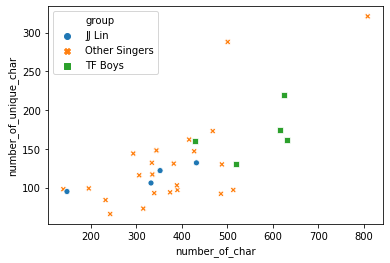

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="number_of_char", y="number_of_unique_char", data=global_songs_df_2, hue="group", style="group")

In [193]:
import plotly.express as px
fig = px.scatter(global_songs_df_2, x="number_of_char", y="number_of_unique_char", title = 'Song unique characters against total no. of characters',hover_data=['song_name'],color='group')
fig.show()

In [167]:
df_JJLin = global_songs_df_2.loc[global_songs_df_2.group == "JJ Lin"]
df_TFBoys = global_songs_df_2.loc[global_songs_df_2.group == "TF Boys"]
df_OtherSingers = global_songs_df_2.loc[global_songs_df_2.group == "Other Singers"]

In [168]:
# JJ Lin
song_chinese_joined_JJLin = []
for index, row in df_JJLin.iterrows():
     song_chinese_joined_JJLin += row['song_chinese']
        
dict_word_doc_freq_JJLin = {}
for char in song_chinese_joined_JJLin:
    if char not in dict_word_doc_freq_JJLin:
        dict_word_doc_freq_JJLin[char] = 1
    else:
        dict_word_doc_freq_JJLin[char] += 1

# TF Boys
song_chinese_joined_TFBoys = []
for index, row in df_TFBoys.iterrows():
     song_chinese_joined_TFBoys += row['song_chinese']
        
dict_word_doc_freq_TFBoys = {}
for char in song_chinese_joined_TFBoys:
    if char not in dict_word_doc_freq_TFBoys:
        dict_word_doc_freq_TFBoys[char] = 1
    else:
        dict_word_doc_freq_TFBoys[char] += 1

#Other Singers
song_chinese_joined_OtherSingers = []
for index, row in df_OtherSingers.iterrows():
     song_chinese_joined_OtherSingers += row['song_chinese']
        
dict_word_doc_freq_OtherSingers = {}
for char in song_chinese_joined_OtherSingers:
    if char not in dict_word_doc_freq_OtherSingers:
        dict_word_doc_freq_OtherSingers[char] = 1
    else:
        dict_word_doc_freq_OtherSingers[char] += 1

#CHECK ONE
print(len(dict_word_doc_freq_OtherSingers))
dict_word_doc_freq_OtherSingers

1056


{'轻': 20,
 '落': 20,
 '在': 126,
 '我': 511,
 '掌': 2,
 '心': 64,
 '静': 5,
 '中': 26,
 '结': 9,
 '冰': 3,
 '相': 32,
 '逢': 1,
 '是': 132,
 '前': 26,
 '世': 26,
 '注': 3,
 '定': 32,
 '痛': 7,
 '並': 1,
 '把': 10,
 '快': 11,
 '乐': 4,
 '尝': 1,
 '尽': 7,
 '明': 25,
 '话': 4,
 '那': 48,
 '么': 38,
 '寒': 2,
 '假': 3,
 '装': 3,
 '隻': 3,
 '叮': 1,
 '嚀': 1,
 '泪': 15,
 '也': 54,
 '不': 261,
 '能': 50,
 '信': 18,
 '此': 8,
 '生': 22,
 '如': 21,
 '纸': 1,
 '般': 1,
 '薄': 2,
 '命': 11,
 '慢': 4,
 '地': 31,
 '听': 15,
 '雪': 7,
 '下': 42,
 '的': 402,
 '声': 23,
 '音': 4,
 '闭': 2,
 '着': 61,
 '眼': 33,
 '睛': 19,
 '幻': 3,
 '想': 90,
 '它': 1,
 '会': 73,
 '停': 4,
 '你': 373,
 '没': 42,
 '办': 1,
 '法': 3,
 '靠': 8,
 '近': 6,
 '决': 17,
 '太': 27,
 '情': 44,
 '只': 33,
 '贪': 5,
 '恋': 11,
 '窗': 1,
 '外': 7,
 '好': 34,
 '风': 38,
 '景': 4,
 '品': 5,
 '彷': 2,
 '佛': 8,
 '贴': 1,
 '叫': 11,
 '卿': 2,
 '睁': 1,
 '开': 32,
 '了': 85,
 '漫': 8,
 '天': 112,
 '无': 27,
 '谁': 37,
 '来': 66,
 '赔': 1,
 '这': 43,
 '一': 152,
 '光': 21,
 '夜': 15,
 '空': 18,
 '最': 41,
 '亮': 27,
 '星': 13,
 '否': 1

In [169]:
JJLin_info = pd.DataFrame.from_dict(dict_word_doc_freq_JJLin, orient = 'index', columns = ['Word frequency'])
TFBoys_info = pd.DataFrame.from_dict(dict_word_doc_freq_TFBoys, orient = 'index', columns = ['Word frequency'])
OtherSingers_info = pd.DataFrame.from_dict(dict_word_doc_freq_OtherSingers, orient = 'index', columns = ['Word frequency'])
JJLin_info

,Word frequency
原,6
谅,6
我,51
这,13
一,33
...,...
狂,1
哭,1
紧,1
投,1


In [170]:
JJLin_info['Rank'] = df3['rank']
TFBoys_info['Rank'] = df3['rank']
OtherSingers_info['Rank'] = df3['rank']
OtherSingers_info

,Word frequency,Rank
轻,20,460.0
落,20,496.0
在,126,6.0
我,511,9.0
掌,2,890.0
...,...,...
爪,2,2363.0
穿,3,785.0
套,3,1091.0
闻,3,825.0


In [218]:
JJLin_info['Definition'] = df3['definition']
TFBoys_info['Definition'] = df3['definition']
OtherSingers_info['Definition'] = df3['definition']
OtherSingers_info

,Word frequency,Rank,Document Frequency,Document Frequency %,Word,Dictionary Definitio,Dictionary Definition,Definition
轻,20,460.0,9,34.615385,轻,light; easy; gentle; soft; reckless; unimporta...,light; easy; gentle; soft; reckless; unimporta...,"light; easy, simple; gentle"
落,20,496.0,10,38.461538,落,to fall or drop; (of the sun) to set; (of a ti...,to fall or drop; (of the sun) to set; (of a ti...,"fall, drop; net income, surplus"
在,126,6.0,23,88.461538,在,(located) at; (to be) in; to exist; in the mid...,(located) at; (to be) in; to exist; in the mid...,"be at, in, on; consist in, rest"
我,511,9.0,26,100.000000,我,I; me; my\n我们 [ wǒ men ]: we; us; ourselves; o...,I; me; my\n我们 [ wǒ men ]: we; us; ourselves; o...,"our, us, i, me, my, we"
掌,2,890.0,1,3.846154,掌,palm of the hand; sole of the foot; paw; horse...,palm of the hand; sole of the foot; paw; horse...,"palm of hand, sole of foot, paw"
...,...,...,...,...,...,...,...,...
爪,2,2363.0,1,3.846154,爪,(coll.) foot of an animal or bird; (coll.) foo...,(coll.) foot of an animal or bird; (coll.) foo...,"claw, nail, talon; animal feet"
穿,3,785.0,1,3.846154,穿,to wear; to put on; to dress; to bore through;...,to wear; to put on; to dress; to bore through;...,"penetrate, pierce, drill; wear"
套,3,1091.0,1,3.846154,套,to cover; to encase; cover; sheath; to overlap...,to cover; to encase; cover; sheath; to overlap...,"case, cover, wrapper, envelope"
闻,3,825.0,1,3.846154,闻,to hear; news; well-known; famous; reputation;...,to hear; news; well-known; famous; reputation;...,hear; smell; make known; news


In [219]:
JJLin_info['Word'] = JJLin_info.index
TFBoys_info['Word'] = TFBoys_info.index
OtherSingers_info['Word'] = OtherSingers_info.index
JJLin_info

,Word frequency,Rank,Word,Document Frequency,Document Frequency %,Dictionary Definition,Definition
原,6,193.0,原,2,50.0,NaN,"source, origin, beginning"
谅,6,2120.0,谅,2,50.0,to show understanding; to excuse; to presume; ...,"excuse, forgive; guess, presume"
我,51,9.0,我,4,100.0,I; me; my\n我们 [ wǒ men ]: we; us; ourselves; o...,"our, us, i, me, my, we"
这,13,11.0,这,3,75.0,this; these; (commonly pr. [zhei4] before a cl...,"this, the, here"
一,33,2.0,一,4,100.0,one; 1; single; a (article); as soon as; entir...,"one; a, an; alone"
...,...,...,...,...,...,...,...
狂,1,1147.0,狂,1,25.0,mad; wild; violent\n疯狂 [ fēng kuáng ]: crazy; ...,"insane, mad; violent; wild"
哭,1,1210.0,哭,1,25.0,to cry; to weep\n哭泣 [ kū qì ]: to weep\n哭声 [ k...,"weep, cry, wail"
紧,1,560.0,紧,1,25.0,tight; strict; close at hand; near; urgent; te...,"tense, tight, taut; firm, secure"
投,1,516.0,投,1,25.0,to cast; to send; to throw oneself (into the r...,"throw, cast, fling, pitch; jump"


In [282]:
dict_doc_freq_JJLin = {}
for index, row in df_JJLin.iterrows():
    for char in row['unique_char']:
        if char in dict_doc_freq_JJLin:
            dict_doc_freq_JJLin[char] += 1
        else:
            dict_doc_freq_JJLin[char] = 1
JJLin_doc_freq_df = pd.DataFrame.from_dict(dict_doc_freq_JJLin, orient = 'index', columns = ['Document Frequency'])
JJLin_info['Document Frequency'] = JJLin_doc_freq_df
JJLin_info['Document Frequency %'] = JJLin_info['Document Frequency'] * 100 / len(df_JJLin)

dict_doc_freq_TFBoys = {}
for index, row in df_TFBoys.iterrows():
    for char in row['unique_char']:
        if char in dict_doc_freq_TFBoys:
            dict_doc_freq_TFBoys[char] += 1
        else:
            dict_doc_freq_TFBoys[char] = 1
TFBoys_doc_freq_df = pd.DataFrame.from_dict(dict_doc_freq_TFBoys, orient = 'index', columns = ['Document Frequency'])
TFBoys_info['Document Frequency'] = TFBoys_doc_freq_df
TFBoys_info['Document Frequency %'] = TFBoys_info['Document Frequency'] * 100 / len(df_TFBoys)

dict_doc_freq_OtherSingers = {}
for index, row in df_OtherSingers.iterrows():
    for char in row['unique_char']:
        if char in dict_doc_freq_OtherSingers:
            dict_doc_freq_OtherSingers[char] += 1
        else:
            dict_doc_freq_OtherSingers[char] = 1
OtherSingers_doc_freq_df = pd.DataFrame.from_dict(dict_doc_freq_OtherSingers, orient = 'index', columns = ['Document Frequency'])
OtherSingers_info['Document Frequency'] = OtherSingers_doc_freq_df
OtherSingers_info['Document Frequency %'] = OtherSingers_info['Document Frequency'] * 100 / len(df_OtherSingers)

OtherSingers_info

,Word frequency,Rank,Document Frequency,Document Frequency %,Word,Dictionary Definition,Definition
轻,20,460.0,9,34.615385,轻,light; easy; gentle; soft; reckless; unimporta...,"light; easy, simple; gentle"
落,20,496.0,10,38.461538,落,to fall or drop; (of the sun) to set; (of a ti...,"fall, drop; net income, surplus"
在,126,6.0,23,88.461538,在,(located) at; (to be) in; to exist; in the mid...,"be at, in, on; consist in, rest"
我,511,9.0,26,100.000000,我,I; me; my\n我们 [ wǒ men ]: we; us; ourselves; o...,"our, us, i, me, my, we"
掌,2,890.0,1,3.846154,掌,palm of the hand; sole of the foot; paw; horse...,"palm of hand, sole of foot, paw"
...,...,...,...,...,...,...,...
爪,2,2363.0,1,3.846154,爪,(coll.) foot of an animal or bird; (coll.) foo...,"claw, nail, talon; animal feet"
穿,3,785.0,1,3.846154,穿,to wear; to put on; to dress; to bore through;...,"penetrate, pierce, drill; wear"
套,3,1091.0,1,3.846154,套,to cover; to encase; cover; sheath; to overlap...,"case, cover, wrapper, envelope"
闻,3,825.0,1,3.846154,闻,to hear; news; well-known; famous; reputation;...,hear; smell; make known; news


# Analysis with groups of songs

In [275]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter(JJLin_info, x="Word frequency", y="Rank",title = 'Word Analysis - JJ Lin Songs',color='Document Frequency %',hover_data=['Word', 'Document Frequency' , 'Document Frequency %', "Definition"])
fig.show()

In [222]:
fig = px.scatter(JJLin_info, x="Document Frequency %", y="Rank",title = 'Word Analysis 2 - JJ Lin Songs',color='Document Frequency %',hover_data=['Word', 'Document Frequency' , 'Word frequency',"Definition"])
fig.show()

In [223]:
fig = px.scatter(TFBoys_info, x="Word frequency", y="Rank",title = 'Word Analysis - TF Boys Songs',color='Document Frequency %',hover_data=['Word', 'Document Frequency' , 'Document Frequency %',"Definition"])
fig.show()

In [224]:
fig = px.scatter(TFBoys_info, x="Document Frequency %", y="Rank",title = 'Word Analysis 2 - TF Boys Songs',color='Document Frequency %',hover_data=['Word', 'Document Frequency' , 'Word frequency',"Definition"])
fig.show()

In [225]:
fig = px.scatter(OtherSingers_info, x="Word frequency", y="Rank",title = 'Word Analysis - Other Singers Songs',color='Document Frequency %',hover_data=['Word', 'Document Frequency' , 'Document Frequency %',"Definition"])
fig.show()

In [226]:
fig = px.scatter(OtherSingers_info, x="Document Frequency %", y="Rank",title = 'Word Analysis 2 - Other Singers Songs',color='Document Frequency %',hover_data=['Word', 'Document Frequency' , 'Word frequency',"Definition"])
fig.show()

# Ignore

In [116]:
#Function: Enter masked global_songs_df_2 and return back list of unique characters
def enter_masked_global_return_unique(masked_df):
    unique_chinese_column = []
    for index, row in masked_df.iterrows():
        unique_chinese_column = unique_chinese_column + [j[0] for i in row[4] for j in i]
    return list(set(unique_chinese_column))

#In this case, the entire global_songs_df_2 is entered
enter_masked_global_return_unique_list = enter_masked_global_return_unique(global_songs_df_2)
print(enter_masked_global_return_unique_list)
print(len(enter_masked_global_return_unique_list))

['小', '眨', '提', '局', '她', '欠', '思', '观', '陷', '课', '轻', '常', '醉', '降', '铭', '郊', '受', '化', '杯', '圣', '限', '躯', '緒', '马', '怕', '决', '十', '护', '执', '枷', '嚐', '並', '双', '啊', '经', '习', '默', '管', '爪', '间', '身', '乡', '贝', '难', '唇', '疑', '寒', '憬', '虽', '纯', '险', '废', 'i', '轮', '古', '毁', '呼', '必', '情', '探', '着', '背', 'g', '恼', '凭', '善', '而', '销', '慈', '發', '青', '王', '听', '醒', '出', '擅', '欢', '魘', '罗', '熔', '漫', '殞', '却', '绵', '幸', '榭', '和', '踩', '猜', '更', '索', '适', '捨', '于', '颗', '夏', '条', '华', '鐘', '裂', '准', '面', '娇', '颤', '关', '懒', '祈', '实', '火', '断', '惯', '约', '疲', '凋', '幕', '宠', '利', 'k', '握', '委', '争', '话', '城', '镜', '玉', '逅', '曬', '叶', '么', '布', '解', '亮', '髒', '看', '雾', '致', '细', '。', '延', '少', '把', '墙', '装', '现', '守', '名', '撞', '碎', '璃', '速', '协', '昏', '洋', '悔', '匆', '咀', '缓', '我', '確', '走', '意', '量', '染', '氧', '泪', '山', '彷', '擦', '格', '庞', '省', '留', '兴', '规', '插', '璽', '此', '当', '翅', '屈', '车', '跡', '雪', '憾', '高', '折', '还', '粹', '念', '由', '请', '摇', '做', '年', '珍', '剑', '嘴', '儿', '控', '眺',

# Converting chosen song to word document

In [230]:
global_songs_df_2

,url,singer,album,song_name,song,unique_char,group,number_of_char,number_of_unique_char,song_chinese
0,https://musicacrossasia.blogspot.com/2016/06/j...,Singer : JJ Lin 林俊傑,Album : From M.E To Myself,Title : Bu wei shui er zuo de ge 不為誰而作的歌,"[[[原, yuán], [谅, liàng], [我, wǒ], [这, zhè], [一...","[记, 然, 头, 抬, 过, 些, 忘, 上, 色, 实, 觉, 心, 去, 感, 水, ...",JJ Lin,332,106,"[原, 谅, 我, 这, 一, 首, 不, 为, 谁, 而, 作, 的, 歌, 感, 觉, ..."
1,https://musicacrossasia.blogspot.com/2018/09/l...,Singer: Lu Hu 陸虎,Album: Xue Luo Xia De Sheng Yin 雪落下的聲音,Title: Xue Luo Xia De Sheng Yin 雪落下的聲音 | 電視劇《延...,"[[[轻, qīng], [轻, qīng], ，, [落, luò], [在, zài],...","[天, 明, 睛, 卿, 般, 贪, 隻, 轻, 它, 幻, 並, 逢, 开, 心, 结, ...",Other Singers,139,98,"[轻, 轻, 落, 在, 我, 掌, 心, 静, 静, 在, 掌, 中, 结, 冰, 相, ..."
3,https://musicacrossasia.blogspot.com/2016/07/g...,Singer : G.E.M 鄧紫棋,Album : Ye Kong Zhong Zui Liang De Xing 夜空中最亮的星,Title : Ye Kong Zhong Zui Liang De Xing 夜空中最亮的星,"[[[夜, yè], [空, kōng], [中, zhōng], [最, zuì], [亮...","[明, 睛, 记, 祈, 颗, 今, 过, 迷, 忘, 同, 願, 独, 祷, 存, 心, ...",Other Singers,339,93,"[夜, 空, 中, 最, 亮, 的, 星, 能, 否, 听, 清, 那, 仰, 望, 的, ..."
4,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh...","[天, 承, 剧, 重, 演, 死, 亲, 春, 带, 山, 错, 早, 头, 刃, 南, ...",Other Singers,501,288,"[日, 和, 月, 在, 重, 演, 谁, 号, 令, 齐, 天, 齐, 天, 断, 恩, ..."
5,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh...","[天, 承, 剧, 重, 演, 死, 亲, 春, 带, 山, 错, 早, 头, 刃, 南, ...",Other Singers,501,288,"[日, 和, 月, 在, 重, 演, 谁, 号, 令, 齐, 天, 齐, 天, 断, 恩, ..."
6,https://musicacrossasia.blogspot.com/2017/06/h...,Singer : Hua Chen Yu 华晨宇,Album : Qi Tian 齊天,Title : Qi Tian 齊天,"[[[日, rì], [和, hé], [月, yuè], [在, zài], [重, zh...","[天, 承, 剧, 重, 演, 死, 亲, 春, 带, 山, 错, 早, 头, 刃, 南, ...",Other Singers,501,288,"[日, 和, 月, 在, 重, 演, 谁, 号, 令, 齐, 天, 齐, 天, 断, 恩, ..."
7,https://musicacrossasia.blogspot.com/2017/03/n...,"Singer : Namewee 黃明志, Wang Leehom 王力宏",Album : CROSSOVER ASIA,Title : Piao Xiang Bei Fang 漂向北方,"[[[飘, piāo], [向, xiàng], [北, běi], [方, fāng], ...","[忍, 天, 迹, 求, 融, 头, 怀, 抬, 幻, 过, 措, 环, 上, 职, 涮, ...",Other Singers,809,321,"[飘, 向, 北, 方, 别, 问, 我, 家, 乡, 高, 耸, 古, 老, 的, 城, ..."
8,https://musicacrossasia.blogspot.com/2017/08/h...,Singer : Hebe Tien 田馥甄,Album : A Little Happiness 小幸運,Title : 小幸運 Xiao Xing Yun,"[[[我, wǒ], [听, tīng], [见, jiàn], [雨, yǔ], [滴, ...","[天, 雨, 直, 记, 懂, 陪, 然, 春, 幸, 忘, 上, 願, 觉, 开, 心, ...",Other Singers,416,162,"[我, 听, 见, 雨, 滴, 落, 在, 青, 青, 草, 地, 我, 听, 见, 远, ..."
9,https://musicacrossasia.blogspot.com/2017/07/t...,Singer : TFBOYS,Album : Big Dreamer,Title : Chong Ai 寵愛,"[[[小, xiǎo], [小, xiǎo], [的, de], [年, nián], [纪...","[忍, 天, 睛, 明, 懂, 哟, 陪, 头, 过, 脑, 上, 何, 开, 蔥, 心, ...",TF Boys,632,162,"[小, 小, 的, 年, 纪, 还, 不, 懂, 什, 么, 是, 爱, 却, 被, 你, ..."
10,https://musicacrossasia.blogspot.com/2017/06/t...,Singer : TFBOYS,Album : Shi Ni 是你 (It's You),Title : Shi Ni 是你,"[[[王, wáng], [俊, jùn], [凯, kǎi], , W, a, n, g...","[精, 天, 直, 明, 重, 懂, 宙, 某, 过, 些, 像, 烟, 狐, 烁, 独, ...",TF Boys,616,174,"[王, 俊, 凯, 易, 烊, 千, 璽, 王, 源, 一, 直, 相, 信, 着, 在, ..."


In [231]:
df3

,traditional_character_one,traditional_character,rank,strokes,makeup,pinyin,alternate_pinyin,definition,dict_definition
simplified_character,,,,,,,,,
的,NaN,NaN,1,8画,\n白 + 3,de,"dí, dì","possessive, adjectival suffix",of; ~'s (possessive particle); (used after an ...
一,NaN,NaN,2,1画,\n一 + 0,yī,NaN,"one; a, an; alone",one; 1; single; a (article); as soon as; entir...
是,NaN,NaN,3,9画,\n日 + 5,shì,NaN,"indeed, yes, right; to be; demonstrative prono...",is; are; am; yes; to be\n但是 [ dàn shì ]: but; ...
不,NaN,NaN,4,4画,\n一 + 3,bù,"fǒu, fōu","no, not; un-; negative prefix",(negative prefix); not; no\n不客气 [ bù kè qi ]: ...
了,瞭,瞭,5,2画,\n亅了 + 1,le,liǎo,to finish; particle of completed action,(modal particle intensifying preceding clause)...
...,...,...,...,...,...,...,...,...,...
颓,頹,NaN,2996,13画,\n页 + 7,tuí,NaN,"ruined, decayed; disintegrate",to crumble; to collapse; to decline; to decay;...
熏,熏,熏 燻,2997,14画,\n火灬 + 10,xūn,xùn,"smoke, fog, vapor; smoke, cure",to smoke; to fumigate; to assail the nostrils;...
瑛,NaN,NaN,2998,13画,\n玉玊王 + 9,yīng,NaN,luster of gem; crystal,(crystal); lustrous\n周传瑛 [ zhōu chuán yīng ]: ...


In [254]:
df5 = df3.copy().loc[global_songs_df_2.loc[0,"unique_char"],:]
df5.sort_values("rank", ascending = False, inplace = True) 
df5["simplified_character"] = df5.index
df5

,traditional_character_one,traditional_character,rank,strokes,makeup,pinyin,alternate_pinyin,definition,dict_definition,simplified_character
simplified_character,,,,,,,,,,
浇,澆,澆,2866.0,9画,\n水氵氺 + 6,jiāo,ào,"spray, water, sprinkle",to pour liquid; to irrigate (using waterwheel)...,浇
瞒,瞞,瞞,2405.0,15画,\n目 + 10,mán,"mén, mèn","deceive, lie; eyes half-closed",to conceal from; to keep (sb) in the dark\n隐瞒 ...,瞒
谅,諒,諒,2120.0,10画,\n讠 + 8,liàng,liáng,"excuse, forgive; guess, presume",to show understanding; to excuse; to presume; ...,谅
躲,NaN,NaN,1644.0,13画,\n身 + 6,duǒ,NaN,"hide, secrete; avoid, escape",to hide; to dodge; to avoid\n躲藏 [ duǒ cáng ]: ...,躲
抬,NaN,NaN,1386.0,8画,\n手扌 + 5,tái,NaN,"lift, carry",to lift; to raise; (of two or more persons) to...,抬
...,...,...,...,...,...,...,...,...,...,...
是,NaN,NaN,3.0,9画,\n日 + 5,shì,NaN,"indeed, yes, right; to be; demonstrative prono...",is; are; am; yes; to be\n但是 [ dàn shì ]: but; ...,是
一,NaN,NaN,2.0,1画,\n一 + 0,yī,NaN,"one; a, an; alone",one; 1; single; a (article); as soon as; entir...,一
的,NaN,NaN,1.0,8画,\n白 + 3,de,"dí, dì","possessive, adjectival suffix",of; ~'s (possessive particle); (used after an ...,的


In [274]:
from docx import Document
from docx.shared import Inches
document = Document()
p = document.add_paragraph('')
  
for j in range(4):
    p.add_run(global_songs_df_2.iloc[2,j])
    p.add_run("\n")
        
counter_4 = 0
p.add_run("\n")
for line in global_songs_df_2.iloc[2,4]:
    chinese_print = ""
    pinyin_print = ""
    for pair in line:
        space_to_add = 0
        chinese_print += pair[0]
        try:
            pinyin_print = pinyin_print + pair[1] + " "
            space_to_add = len(pair[1]) - 1
            chinese_print += space_to_add *  " "
        except:
            pinyin_print += pair[0]
    p.add_run(chinese_print)
    p.add_run("\n")
    p.add_run(pinyin_print)
    p.add_run("\n")
    print(chinese_print)
    print(pinyin_print)
    counter_4 += 1
    if counter_4 == 4:
        print("\n")
        p.add_run("\n")
        counter_4 = 0

N= len(df5)
table = document.add_table(rows=N, cols=3)

hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Word'
hdr_cells[1].text = 'Rank'
hdr_cells[2].text = 'Definition'

for i in range(N):
    row_cells = table.add_row().cells
    row_cells[0].text = str(df5.iloc[i,9])
    row_cells[1].text = str(df5.iloc[i,2])
    row_cells[2].text = str(df5.iloc[i,8])

    document.add_page_break()

document.save('simple.docx')

夜 空   中    最  亮    的 星    能   否  听   清   
yè kōng zhōng zuì liàng de xīng  néng fǒu tīng qīng 
那 仰   望   的 人   心  底 的 孤 独 和 嘆息 
nà yǎng wàng de rén  xīn dǐ de gū dú hé  xī 
夜 空   中    最  亮    的 星    能   否  记 起 
yè kōng zhōng zuì liàng de xīng  néng fǒu jì qǐ 
曾   与 我 同   行    消   失  在  风   里 的 身   影   
céng yǔ wǒ tóng xíng  xiāo shī zài fēng lǐ de shēn yǐng 


我 祈 祷  拥   有  一 颗 透  明   的 心  灵   
wǒ qí dǎo yǒng yǒu yī kē tòu míng de xīn líng 
和 会  流  泪  的 眼  睛   
hé huì liú lèi de yǎn jīng 
给  我 再  去 相    信  的 勇   气 
gěi wǒ zài qù xiāng xìn de yǒng qì 
越  过  谎    言  去 拥   抱  你 
yuè guò huǎng yán qù yǒng bào nǐ 


每  当   我 找   不 到  存  在  的 意 义 
měi dāng wǒ zhǎo bù dào cún zài de yì yì 
每  当   我 迷 失  在  黑  夜 里 
měi dāng wǒ mí shī zài hēi yè lǐ 
夜 空   中    最  亮    的 星   
yè kōng zhōng zuì liàng de xīng 
请   照   亮    我 前   行   
qǐng zhào liàng wǒ qián xíng 


夜 空   中    最  亮    的 星    是  否  知  道  
yè kōng zhōng zuì liàng de xīng  shì fǒu zhī dào 
曾   与 我 同   行   的 身   影    如 今  在  哪 里 
céng 